In [1]:
#importing tools
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#creating a sample dataset for training
input_np, output_np = datasets.make_regression(n_samples=200, n_features=1, noise=25, random_state=1)

#converting np array dataset to torch tensor
X = torch.from_numpy(input_np.astype(np.float32))
Y = torch.from_numpy(output_np.astype(np.float32))
print(Y.shape)
print(Y)

torch.Size([200])
tensor([  39.5495,  -12.4000,   83.2545,   38.9812,  174.5605,  -14.8769,
         -75.1626, -144.8330,   34.5125,   38.2657,  -67.5651,   21.1745,
          82.5315,   87.3073,  -13.8139,  189.1376,   96.0078,   60.6918,
          17.6064, -110.6862,   77.3713,   -5.3372,   52.4106,  176.0202,
        -116.8493,  -58.6383,   81.4190,  -27.6927,   11.4728,  114.8487,
        -121.0491,   65.9009,  -74.8899, -136.7871,   24.8931, -152.7554,
           9.7163,  159.4391,  104.2089,   17.2801,  193.9033,  -48.6307,
           7.4524, -115.2226, -167.0726,   29.1139,  169.6172,   27.2276,
         133.9145,   54.6225,   69.5455,  -38.6392,  -67.0503,  -88.4275,
         -99.5770,   85.9852,   40.7443,   51.2142,  -73.0427,    7.5517,
           5.2456,   56.6738,  -23.6335,  131.1664,  119.5950,  -16.0566,
         -45.5747,   34.3816,  175.4396,  -55.0337,   -2.2199, -144.7196,
          29.4599,  -45.9730,   -2.5679, -237.5902,  -55.6166,    4.4102,
         182.6415,  

In [7]:
# converting Y into column matrix
Y= Y.view(Y.shape[0],1)
print(Y.shape)
print(Y)

torch.Size([200, 1])
tensor([[  39.5495],
        [ -12.4000],
        [  83.2545],
        [  38.9812],
        [ 174.5605],
        [ -14.8769],
        [ -75.1626],
        [-144.8330],
        [  34.5125],
        [  38.2657],
        [ -67.5651],
        [  21.1745],
        [  82.5315],
        [  87.3073],
        [ -13.8139],
        [ 189.1376],
        [  96.0078],
        [  60.6918],
        [  17.6064],
        [-110.6862],
        [  77.3713],
        [  -5.3372],
        [  52.4106],
        [ 176.0202],
        [-116.8493],
        [ -58.6383],
        [  81.4190],
        [ -27.6927],
        [  11.4728],
        [ 114.8487],
        [-121.0491],
        [  65.9009],
        [ -74.8899],
        [-136.7871],
        [  24.8931],
        [-152.7554],
        [   9.7163],
        [ 159.4391],
        [ 104.2089],
        [  17.2801],
        [ 193.9033],
        [ -48.6307],
        [   7.4524],
        [-115.2226],
        [-167.0726],
        [  29.1139],
        [ 169

In [8]:
#number of features and samples
n_samples, n_features = X.shape
print(n_samples, n_features)

200 1


In [12]:
#Building linear regression model
input_size = n_features
output_size = 1
model= nn.Linear(input_size, output_size)

In [10]:
#Loss function
loss_func = nn.MSELoss()

In [14]:
#weight Optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
#training the linear model
epochs = 100

for epoch in range(epochs):
    #forward pass
    y_predict = model(X)
    #calculate loss
    loss = loss_func(y_predict, Y)
    #backward pass
    loss.backward()
    #update weights
    optimizer.step()
    optimizer.zero_grad()

    if(epoch+1)%10 ==0:
        print(f'Epoch count = {epoch+1}, loss = {loss.item():.4f}')


Epoch count = 10, loss = 3999.0315
Epoch count = 20, loss = 3025.4478
Epoch count = 30, loss = 2334.3503
Epoch count = 40, loss = 1842.7571
Epoch count = 50, loss = 1492.3942
Epoch count = 60, loss = 1242.2312
Epoch count = 70, loss = 1063.3070
Epoch count = 80, loss = 935.1328
Epoch count = 90, loss = 843.1781
Epoch count = 100, loss = 777.1184


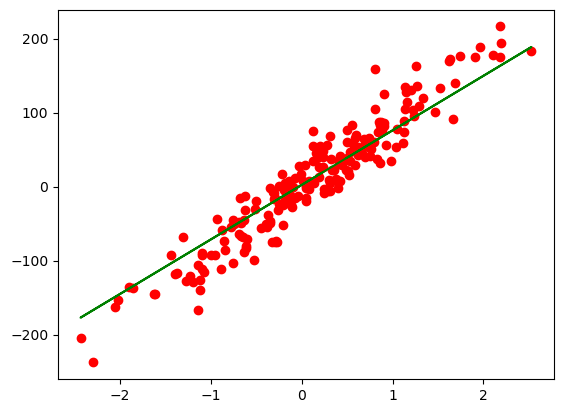

In [25]:
#ploting the original dataset and predicted values
predicted_values = model(X).detach().numpy()
plt.plot(input_np, output_np, 'ro')
plt.plot(input_np, predicted_values, 'g')
plt.show()
